In [1]:
!pip install -q -U mxnet-cu101mkl==1.6.0.post0 
!pip install d2l==0.14.0


     |████████████████████████████████| 712.3MB 21kB/s 
     |████████████████████████████████| 51kB 3.1MB/s 


In [6]:
!pip install gluoncv

     |████████████████████████████████| 819kB 7.4MB/s 


In [7]:
!git clone "https://github.com/Ravikiran-Bhonagiri/aws-machine-learning-university-accelerated-cv.git"

fatal: destination path 'aws-machine-learning-university-accelerated-cv' already exists and is not an empty directory.


In [8]:
%matplotlib inline
from gluoncv import model_zoo
from gluoncv.data.transforms.presets.imagenet import transform_eval
from gluoncv.utils.viz.image import plot_image
from matplotlib import pyplot as plt
from mxnet import nd, image

In [9]:
net = model_zoo.get_model('ResNet50_v1', pretrained=True)

100%|██████████| 57421/57421 [00:02<00:00, 23733.54KB/s]


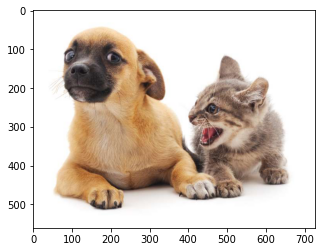

In [10]:
img_raw = image.imread('/content/aws-machine-learning-university-accelerated-cv/data/catdog.png')
img = transform_eval(img_raw)
plot_image(img_raw)

In [13]:
pred = net(img)
print(len(pred[0]))
print(pred)

1000

[[-1.96483850e-01  4.73107576e-01 -8.27145576e-02 -1.19602978e-02
   5.26464522e-01  8.07385802e-01 -4.15961504e-01  2.69583017e-02
   7.09550917e-01 -1.11927062e-01  6.12744689e-02  1.06612980e+00
   9.86417174e-01 -4.30295825e-01 -3.20252776e-02  1.91859961e-01
   4.74831700e-01  6.75630927e-01 -2.85879970e-01  2.57749528e-01
  -2.47894108e-01  2.15996265e-01  1.71580821e-01  1.61929071e+00
  -1.82985991e-01  1.87793446e+00  9.79983509e-01  4.96200323e-01
   8.66122186e-01  7.56586552e-01  4.85059619e-01 -3.95348519e-01
   1.31258321e+00  6.32098436e-01  2.36221462e-01  5.15776157e-01
   6.13397300e-01  7.77318954e-01  3.80064309e-01  2.27422535e-01
   3.55992079e-01  4.81394053e-01 -1.46340758e-01  2.30354726e-01
   7.15112448e-01  1.66831660e+00 -7.69697428e-02  5.84741712e-01
   2.33171761e-01 -1.71522111e-01 -2.97071308e-01  1.29377127e+00
   7.14263856e-01  3.60499233e-01  2.49156773e-01 -6.96656406e-02
  -6.22898936e-02  2.63114214e-01  5.24287596e-02 -1.88311934e-02
  -1

In [15]:
classes = net.classes
print(classes[:5])
print(classes)

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'In

In [17]:
topK = 10
ind = nd.topk(pred, k=topK)[0].astype('int')
print('The input picture is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'%
          (classes[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()))

The input picture is classified to be
	[Chihuahua], with probability 0.451.
	[Brabancon griffon], with probability 0.035.
	[bull mastiff], with probability 0.016.
	[Rhodesian ridgeback], with probability 0.010.
	[Border terrier], with probability 0.008.
	[Staffordshire bullterrier], with probability 0.007.
	[pug], with probability 0.006.
	[tabby], with probability 0.006.
	[Labrador retriever], with probability 0.006.
	[tub], with probability 0.005.
